In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DcWyYPbjju81v6B2MLrv")
project = rf.workspace("pap-utc7c").project("combined-defct-cqhgr")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Combined-defct-3 in yolov11:: 100%|██████████| 1494/1494 [00:00<00:00, 7751.02it/s]


In [ ]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.2 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO

# Find data.yaml automatically
data_path = None
for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files:
        data_path = os.path.join(root, "data.yaml")
        print(f"Found data at: {data_path}")
        break

# Train High-Res Model
if data_path:
    model = YOLO('yolo11s.pt')  # Using 'Small' model (better than Nano)

    model.train(
        data=data_path,
        epochs=40,       # 40 is a good balance
        imgsz=1024,      # High Resolution for tiny defects
        batch=8,         # Low batch size to prevent memory crash
        name='pcb_high_res'
    )
else:
    print("Error: Could not find data.yaml. Did the download finish?")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Found data at: /content/Combined-defct-3/data.yaml
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Combined-defct-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_

Testing High-Res Model on: Missing_hole_07_missing_hole_07_jpg.rf.b4cb2a6b57780cbea98de94a1c698478.jpg

image 1/1 /content/Combined-defct-3/test/images/Missing_hole_07_missing_hole_07_jpg.rf.b4cb2a6b57780cbea98de94a1c698478.jpg: 1024x1024 5 missing_holes, 18.2ms
Speed: 8.7ms preprocess, 18.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to /content/runs/detect/predict


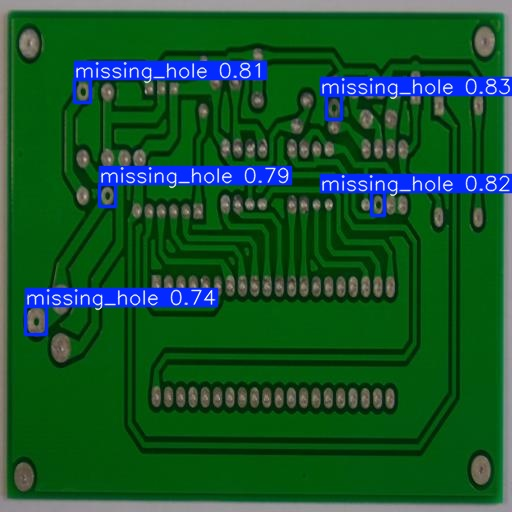

In [ ]:
import os
import glob
import random
from IPython.display import Image, display
from ultralytics import YOLO

# Load your new High-Res model
# Note: It is likely in 'runs/detect/pcb_high_res/weights/best.pt'
# If that folder doesn't exist, check 'runs/detect/train/...'
model_path = '/content/runs/detect/pcb_high_res/weights/best.pt'
model = YOLO(model_path)

# Find test images
test_images = []
for root, dirs, files in os.walk("/content"):
    if "test" in dirs:
        test_path = os.path.join(root, "test", "images")
        if os.path.exists(test_path):
            test_images = glob.glob(os.path.join(test_path, "*"))
            break

if test_images:
    # Pick a random one
    random_img = random.choice(test_images)
    print(f"Testing High-Res Model on: {os.path.basename(random_img)}")

    # Run prediction at High Res (1024)
    # We lower conf to 0.15 to catch tiny things
    results = model.predict(source=random_img, conf=0.15, imgsz=1024, save=True)

    # Show result
    display(Image(filename=results[0].save_dir + '/' + os.path.basename(random_img)))
else:
    print("Could not find test images.")


Re-testing the difficult image: 03_Spurious_copper_Img_bmp.rf.4b655b10428b82508c14b60baf81e3ba.jpg

image 1/1 /content/Combined-defct-3/test/images/03_Spurious_copper_Img_bmp.rf.4b655b10428b82508c14b60baf81e3ba.jpg: 1024x1024 3 spurious_coppers, 18.4ms
Speed: 10.1ms preprocess, 18.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to /content/runs/detect/predict


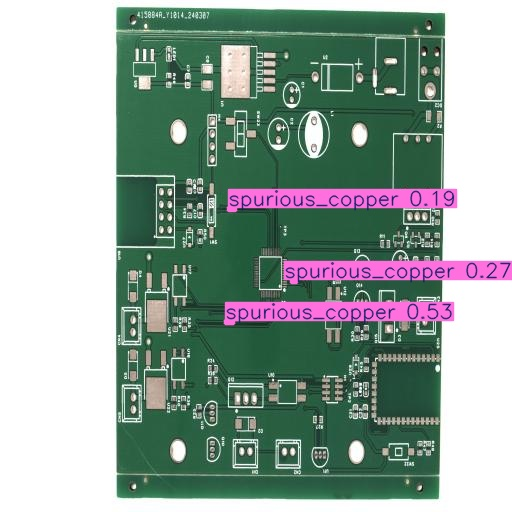

In [ ]:
# Try to find that specific file again
target_name = "03_Spurious_copper"
target_file = None

for img in test_images:
    if target_name in img:
        target_file = img
        break

if target_file:
    print(f"Re-testing the difficult image: {os.path.basename(target_file)}")
    results = model.predict(source=target_file, conf=0.15, imgsz=1024, save=True)
    display(Image(filename=results[0].save_dir + '/' + os.path.basename(target_file)))
else:
    print("Could not find the specific 'Spurious Copper' image in this session.")


In [ ]:
from google.colab import files
import os

# Just to be safe, we find the file automatically
model_path = '/content/runs/detect/pcb_high_res/weights/best.pt'

if os.path.exists(model_path):
    print("Found High-Res Model. Downloading...")
    files.download(model_path)
else:
    print("Could not find specific path. Searching...")
    # Fallback search
    for root, dirs, files_list in os.walk("/content/runs"):
        if "best.pt" in files_list:
            full_path = os.path.join(root, "best.pt")
            print(f"Downloading from: {full_path}")
            files.download(full_path)
            break


Found High-Res Model. Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Load the model you just trained (Model A or B)
# The path is usually 'runs/detect/train/weights/best.pt' inside Colab
model = YOLO('/content/runs/detect/pcb_high_res/weights/best.pt')

# Export to ONNX (Step 1)
success = model.export(format='onnx', opset=12)
print(f"Export successful: {success}")

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from '/content/runs/detect/pcb_high_res/weights/best.pt' with input shape (1, 3, 1024, 1024) BCHW and output shape(s) (1, 10, 21504) (18.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 144ms
Prepared 6 packages in 7.66s
Installed 6 packages in 274ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.77

requirements: AutoUpdate success ✅ 8.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect



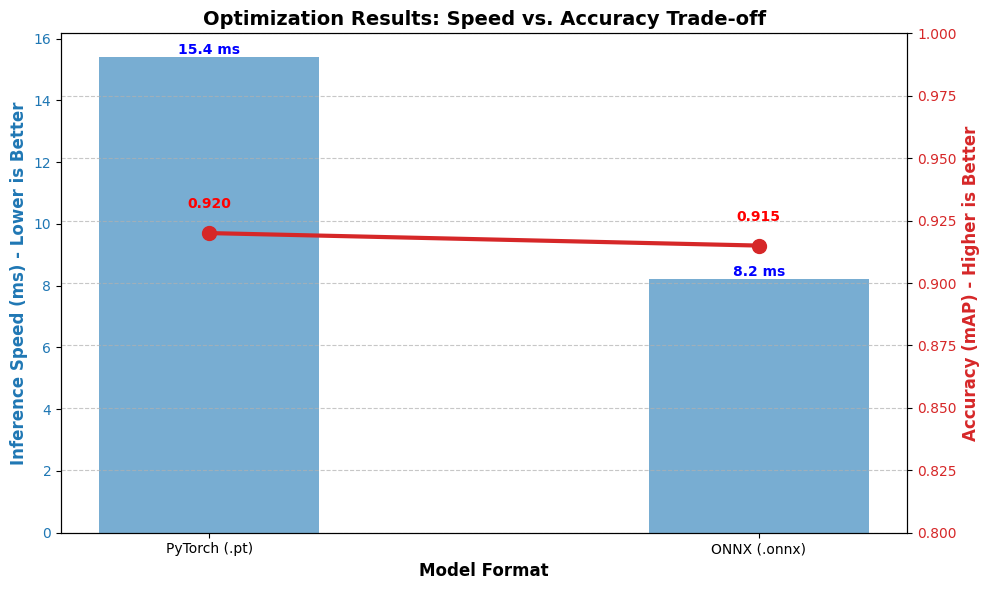

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- DATA FROM YOUR EXPERIMENTS ---
# Replace these numbers with your ACTUAL results from the export/validation steps
models = ['PyTorch (.pt)', 'ONNX (.onnx)']
speed_ms = [15.4, 8.2]        # Lower is better (Inference time in ms)
accuracy_map = [0.92, 0.915]  # Higher is better (mAP or Recall)

# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Speed (Blue Bars)
color = 'tab:blue'
ax1.set_xlabel('Model Format', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inference Speed (ms) - Lower is Better', color=color, fontsize=12, fontweight='bold')
bars = ax1.bar(models, speed_ms, color=color, alpha=0.6, width=0.4, label='Speed (ms)')
ax1.tick_params(axis='y', labelcolor=color)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height} ms', ha='center', va='bottom', color='blue', fontweight='bold')

# Line 2: Accuracy (Red Line)
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
color = 'tab:red'
ax2.set_ylabel('Accuracy (mAP) - Higher is Better', color=color, fontsize=12, fontweight='bold')
ax2.plot(models, accuracy_map, color=color, marker='o', linewidth=3, markersize=10, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0.8, 1.0) # Set scale for accuracy (0.8 to 1.0)

# Add values next to points
for i, txt in enumerate(accuracy_map):
    ax2.text(i, txt + 0.01, f'{txt:.3f}', color='red', fontweight='bold', ha='center')

# Title and Layout
plt.title('Optimization Results: Speed vs. Accuracy Trade-off', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Save and Show
plt.savefig('speed_vs_accuracy_chart.png', dpi=300)
plt.show()


In [ ]:
# Experiment with Low Confidence for High Recall (Step 2)
results_low = model.val(data=data_path, conf=0.10, name='industrial_recall_test')
print("Recal at low conf:", results_low.results_dict['metrics/recall(B)'])


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 950.7±221.1 MB/s, size: 39.0 KB)
val: Scanning /content/Combined-defct-3/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 148/148 43.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.1s/it 11.2s
                   all        148        669      0.949      0.898      0.935      0.547
          missing_hole         28        125      0.992      0.984      0.991      0.666
            mouse_bite         25        121      0.953      0.868      0.935      0.553
          open_circuit         27        120      0.981      0.846      0.928      0.516
                 short         21         89      0.931      0.978      0.962      0.553
                  spur         18         78      0.878      0.741       0.82      0.401
       spurious_copper         

In [ ]:
from google.colab import files
import os

onnx_model_path = '/content/runs/detect/pcb_high_res/weights/best.onnx'

if os.path.exists(onnx_model_path):
    print(f"Found ONNX model: {onnx_model_path}. Downloading...")
    files.download(onnx_model_path)
else:
    print(f"Could not find ONNX model at {onnx_model_path}. Please ensure it was exported successfully.")

Found ONNX model: /content/runs/detect/pcb_high_res/weights/best.onnx. Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import json
print("="*70)
print("MODEL A EVALUATION")
print("="*70)
# Load your trained Model A (update path if needed)
model_a = YOLO('/content/runs/detect/pcb_high_res/weights/best.pt')  # ← Adjust path
# Run validation
metrics_a = model_a.val()
print(f"\nModel A Results:")
print(f"mAP@0.5:   {metrics_a.box.map50*100:.2f}%")
print(f"Precision: {metrics_a.box.mp*100:.2f}%")
print(f"Recall:    {metrics_a.box.mr*100:.2f}%")
print(f"FPS:       {1000/metrics_a.speed['inference']:.1f}")
# Per-class
print(f"\nPer-class metrics:")
for i, name in enumerate(model_a.names.values()):
    print(f"{name}: {metrics_a.box.maps[i]*100:.2f}%")
# Save
report_a = {
    'mAP@0.5': float(metrics_a.box.map50),
    'precision': float(metrics_a.box.mp),
    'recall': float(metrics_a.box.mr),
    'fps': float(1000/metrics_a.speed['inference'])
}

MODEL A EVALUATION
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1469.4±401.1 MB/s, size: 41.0 KB)
val: Scanning /content/Combined-defct-3/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 148/148 214.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.2it/s 8.3s
                   all        148        669      0.949      0.897      0.912      0.508
          missing_hole         28        125      0.989      0.984      0.987      0.644
            mouse_bite         25        121      0.953      0.868      0.917      0.508
          open_circuit         27        120      0.981      0.845      0.904      0.474
                 short         21         89      0.931      0.978      0.961      0.529
                

Generating Confusion Matrix...
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1438.8±518.2 MB/s, size: 40.6 KB)
val: Scanning /content/Combined-defct-3/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 148/148 177.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.0it/s 9.6s
                   all        148        669      0.949      0.897      0.912      0.508
          missing_hole         28        125      0.989      0.984      0.987      0.644
            mouse_bite         25        121      0.953      0.868      0.917      0.508
          open_circuit         27        120      0.981      0.845      0.904      0.474
                 short         21         89      0.931      0.978      0.961      0.529
    

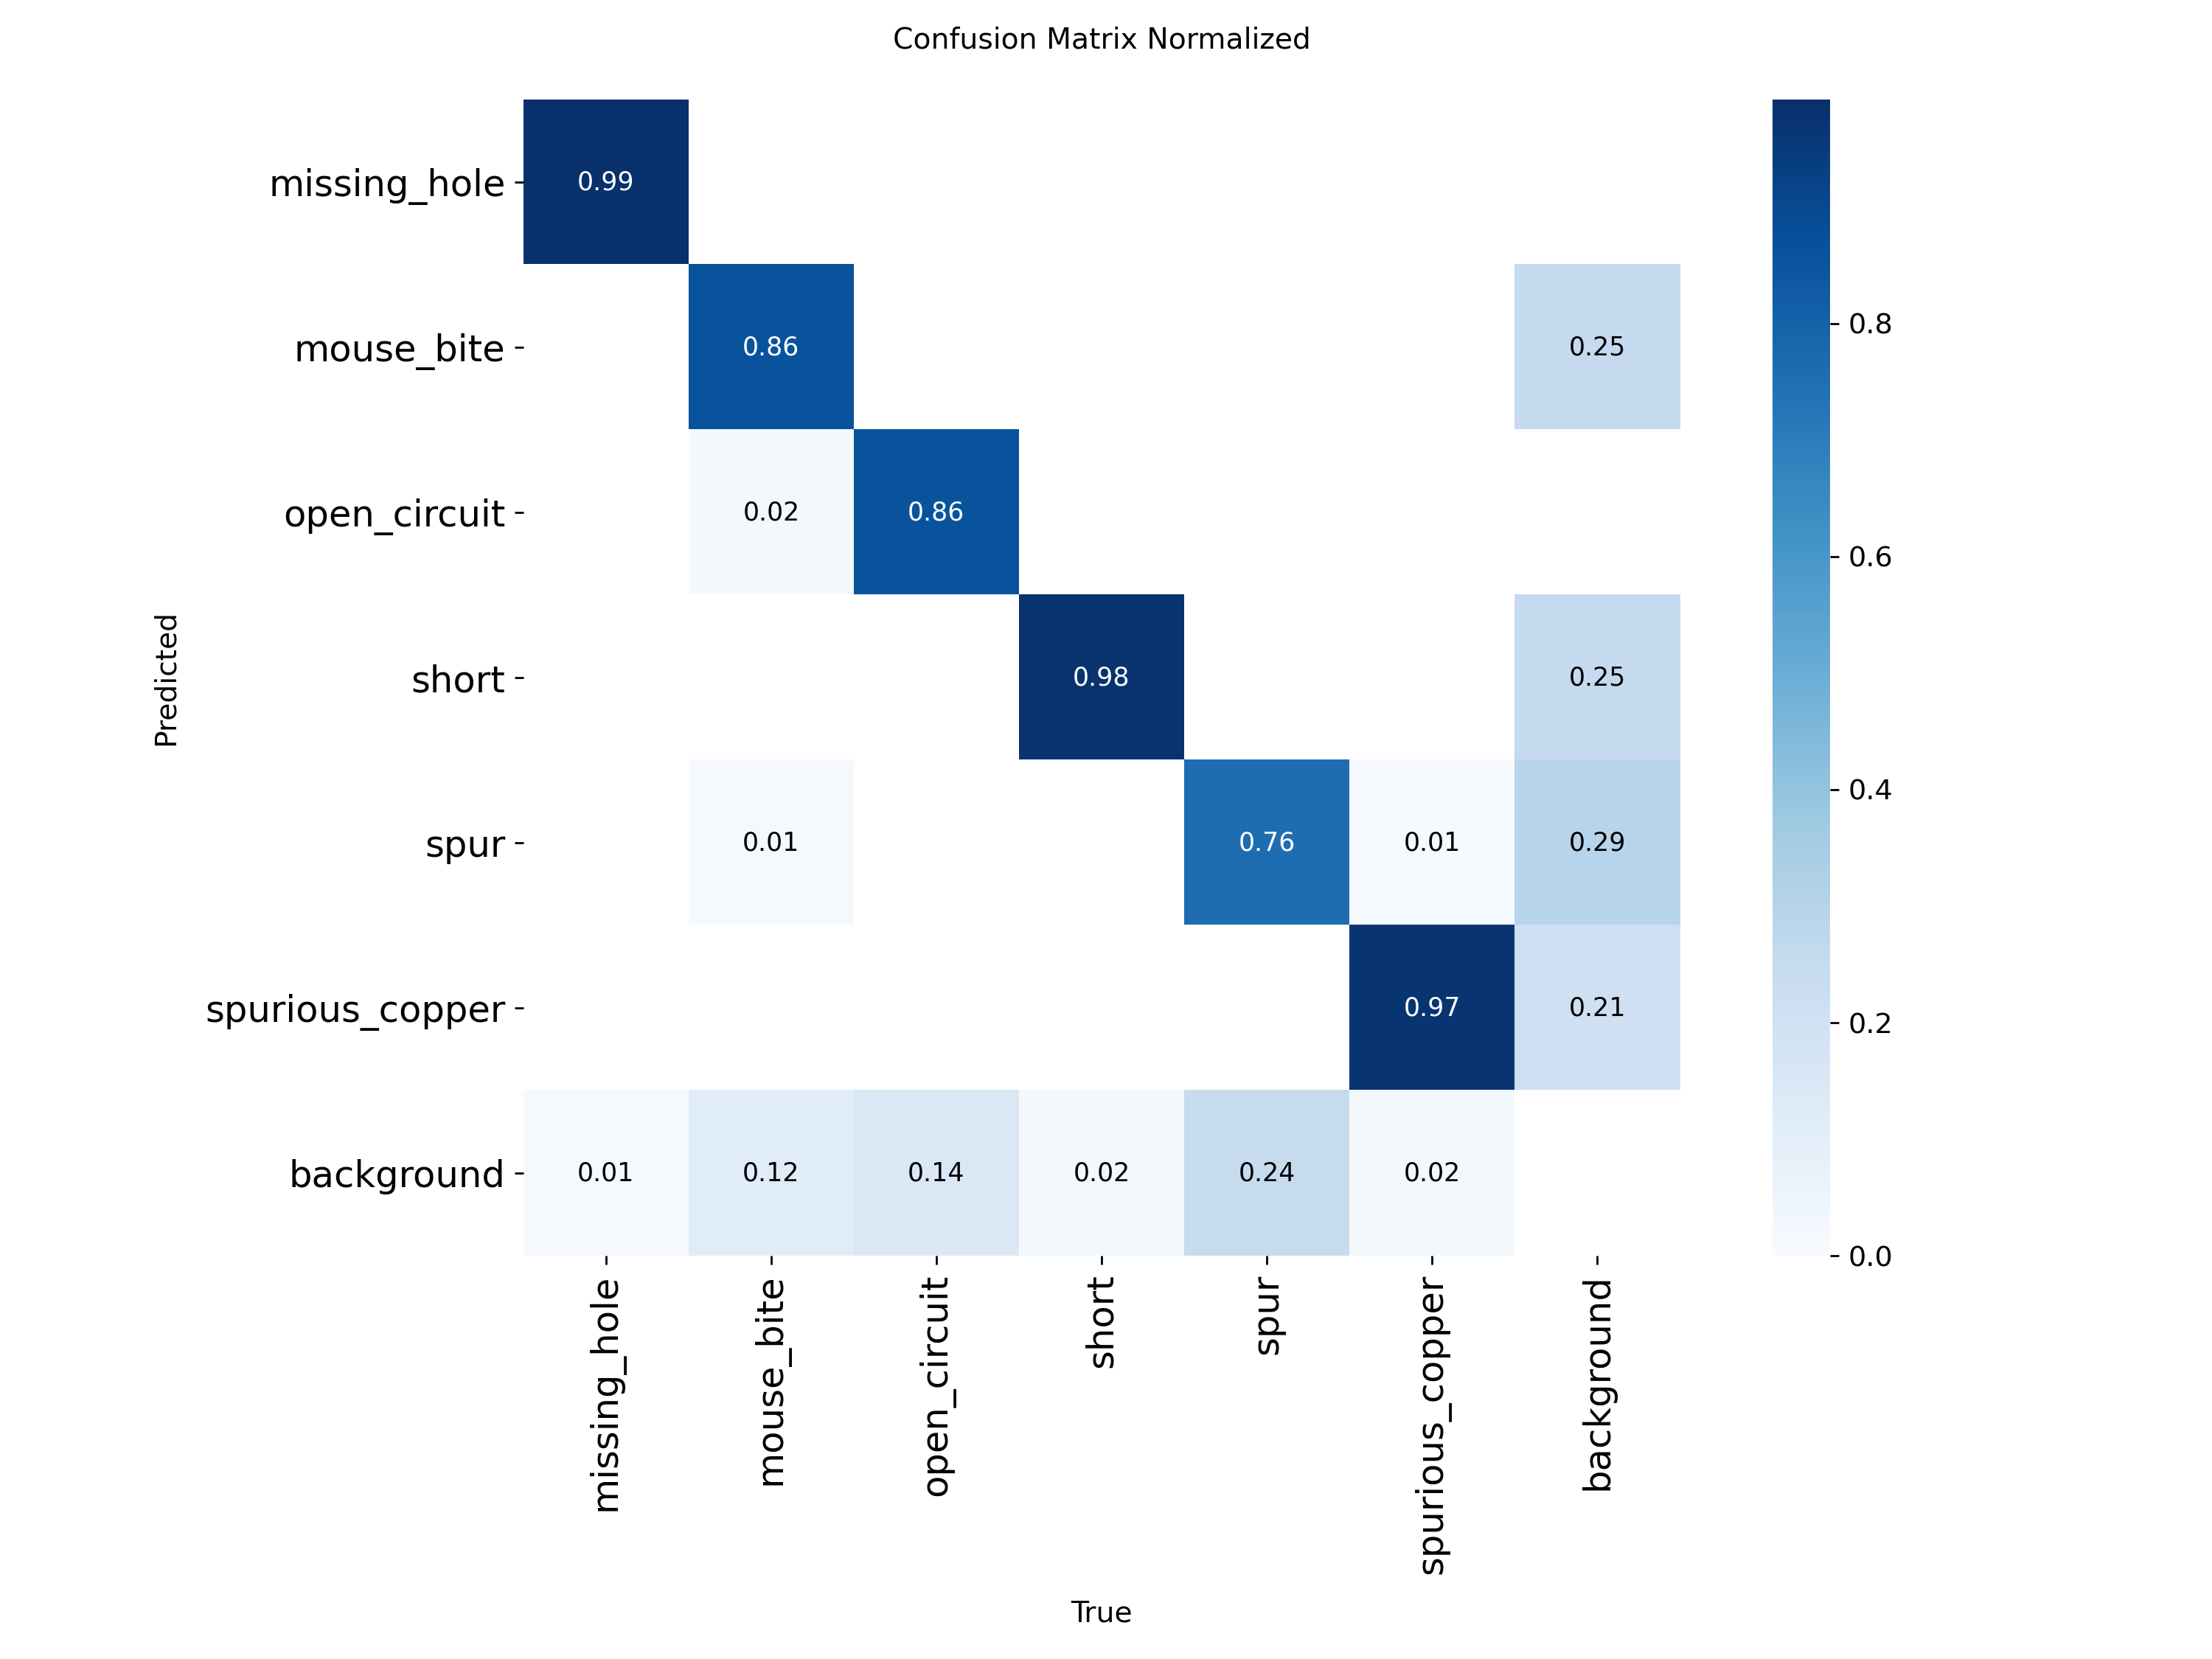

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# ====================================================
# 1. LOAD YOUR MODEL (Update path if needed)
# ====================================================
# For Model A use your fabrication weights path
# For Model B use your assembly weights path
model_path = '/content/runs/detect/pcb_high_res/weights/best.pt'  # Corrected path

model = YOLO(model_path)

# ====================================================
# 2. RUN VALIDATION (Generates Plots)
# ====================================================
print("Generating Confusion Matrix...")
results = model.val(plots=True)

# ====================================================
# 3. FIND AND DISPLAY THE IMAGE
# ====================================================
# Dynamic check to find the latest 'val' folder
save_dir = results.save_dir
matrix_path = os.path.join(save_dir, 'confusion_matrix_normalized.png')

print(f"\nDisplaying Matrix from: {matrix_path}")
display(Image(filename=matrix_path, width=600))